# SVM

Support Vector Machine의 약자

이름대로 Vector 개념을 사용

SVM은 서포트 벡터(support vectors)를 사용해서 결정 경계(Decision Boundary)를 정의하고, 분류되지 않은 점을 해당 결정 경계와 비교해서 분류하는 모델

![006-6](https://user-images.githubusercontent.com/63298243/125198484-06fe3d00-e29d-11eb-86b6-760108a860f1.PNG)

여기서 서포트 벡터(support vectors)는 결정 경계에 가장 가까운 각 클래스의 점들을 말함

SVM의 주 목적은 두 Margin의 거리를 최대화 시킬 수 있는 즉, GAP을 최대화 시킬 수 있는 지점을 찾는 것

그래서 분류되지 않은 새로운 점이 나타나면 경계의 어느 쪽에 속하는지 확인해서 분류 과제를 수행할 수 있음

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm

In [34]:
df = sns.load_dataset('titanic')

## EDA

In [35]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [36]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [37]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
df = df.dropna(subset=["age"], how = 'any', axis=0)

In [39]:
most_freq = df['embarked'].value_counts(dropna=True).idxmax()
df['embarked'].fillna(most_freq, inplace=True)

In [40]:
df.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           530
embark_town      2
alive            0
alone            0
dtype: int64

In [41]:
df = df.drop(['deck', 'class',	'who',	'adult_male',	'embark_town',	'alive',	'alone'], axis=1)

In [42]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [43]:
onehot_sex = pd.get_dummies(df['sex'])
df = pd.concat([df, onehot_sex], axis = 1)

onehot_em = pd.get_dummies(df['embarked'])
df = pd.concat([df, onehot_em], axis = 1)

df.drop(['sex','embarked'], axis=1, inplace=True)

In [44]:
df.head()

,survived,pclass,age,sibsp,parch,fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


### 상관관계 히트맵

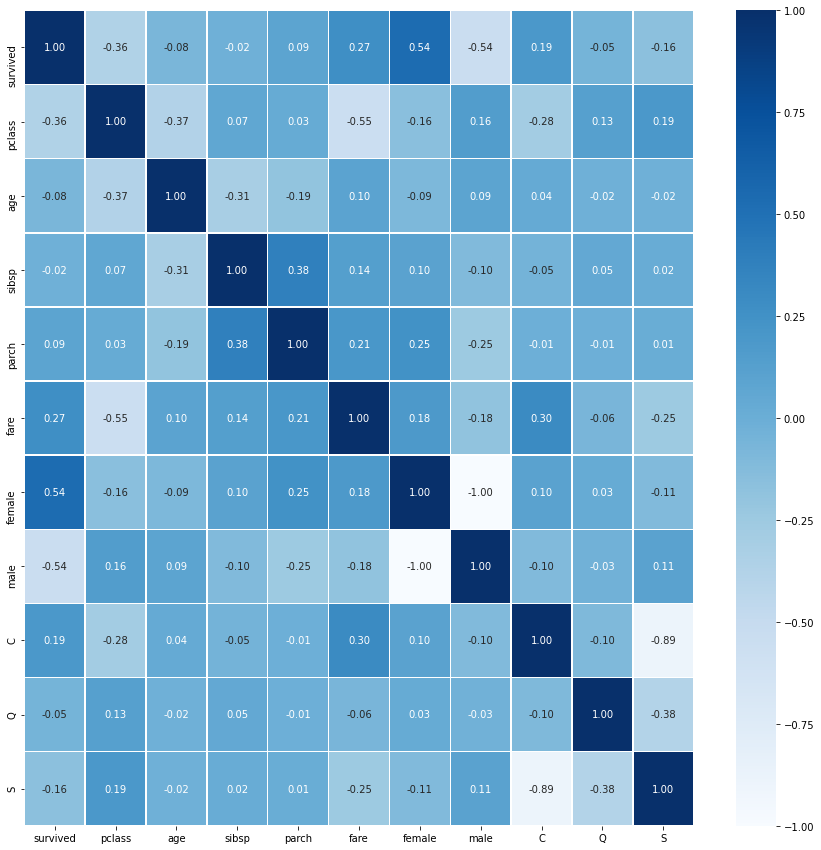

In [48]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths = .5, cmap='Blues')

## Modeling

In [49]:
X=df[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'C', 'Q', 'S']]  #독립 변수 X
y=df['survived']                      #종속 변수 Y

## 정규화 (스케일링)

In [50]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [52]:
X

array([[ 0.91123237, -0.53037664,  0.52457013, ..., -0.47180795,
        -0.20203051,  0.53307848],
       [-1.47636364,  0.57183099,  0.52457013, ...,  2.11950647,
        -0.20203051, -1.87589641],
       [ 0.91123237, -0.25482473, -0.55170307, ..., -0.47180795,
        -0.20203051,  0.53307848],
       ...,
       [-1.47636364, -0.73704057, -0.55170307, ..., -0.47180795,
        -0.20203051,  0.53307848],
       [-1.47636364, -0.25482473, -0.55170307, ...,  2.11950647,
        -0.20203051, -1.87589641],
       [ 0.91123237,  0.15850313, -0.55170307, ..., -0.47180795,
         4.94974747, -1.87589641]])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 
print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


## SVM Model

#### 모델 객체 생성 (kernel='rbf' 적용)

sklearn에서 가져온 svm 모듈의 svc() 함수를 사용하여 모델 객체를 생성

이때 데이터를 벡터 공간으로 매핑하는 함수를 커널이라 하는데

일단은 'rbf' 옵션으로 함수를 적용한다.

rbf : radical basis function (방사형 기저 함수)

이외에도 Linear, Polynimial 등의 커널 옵션을 줄 수 있다.
![006-2](https://user-images.githubusercontent.com/63298243/125198208-ed102a80-e29b-11eb-85de-edd8284f3c41.png)
![006-3](https://user-images.githubusercontent.com/63298243/125198209-ee415780-e29b-11eb-984c-11f712b52dbb.png)
![006-12](https://user-images.githubusercontent.com/63298243/125198214-f1d4de80-e29b-11eb-9806-79cf931f0d7f.png)
![006-13](https://user-images.githubusercontent.com/63298243/125198218-f3060b80-e29b-11eb-82d0-3c810cc622fc.png)



#### C
데이터들을 선형적으로 완벽하게 분리해내는 것은 불가능하다. 

이를 해결하기 위해서 약간의 오류를 허용하는 전략이 만들어졌다. 

이것과 관련된 파라미터가 바로 cost(C)이다. 

C는 얼마나 많은 데이터 샘플이 다른 클래스에 놓이는 것을 허용하는지를 결정한다. 

작을 수록 많이 허용하고, 클 수록 적게 허용한다. 

![006-7](https://user-images.githubusercontent.com/63298243/125198319-6b6ccc80-e29c-11eb-82a5-125881f3afc4.png)


#### gamma (rbf커널에서만 적용)
gamma 파라미터는 결정 경계의 곡률을 조정한다.

![006-8](https://user-images.githubusercontent.com/63298243/125198331-758ecb00-e29c-11eb-8728-e185341405b0.png)
![006-9](https://user-images.githubusercontent.com/63298243/125198332-76bff800-e29c-11eb-9120-d70576e596b5.png)
![006-10](https://user-images.githubusercontent.com/63298243/125198333-76bff800-e29c-11eb-9354-da119bfe0575.png)

In [59]:
svm_model = svm.SVC(kernel='rbf', C = 0.5, gamma=1)

In [60]:
svm_model.fit(X_train, y_train) 

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [61]:
r_square = svm_model.score(X_test, y_test)
print(r_square*100)

81.86046511627907
